# Healthcare Appointment No-Show Prediction

### Step 1: Import Libraries & Load Data

In [11]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Load dataset
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Step 2: Clean and Prepare Data

In [4]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace('-', '_')

# Convert date columns to datetime
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

# Create new column: waiting days
df['waiting_days'] = (df['appointmentday'] - df['scheduledday']).dt.days

# Remove negative waiting times if any
df = df[df['waiting_days'] >= 0]

# Map target column 'no_show' to binary
df['no_show'] = df['no_show'].map({'Yes': 1, 'No': 0})

# Create new column: weekday of appointment
df['weekday'] = df['appointmentday'].dt.day_name()


### Step 3: Feature Engineering

In [6]:
# Drop irrelevant features
df_model = df.drop(['patientid', 'appointmentid', 'scheduledday', 'appointmentday'], axis=1)

# Encode categorical variables
df_model = pd.get_dummies(df_model, columns=['gender', 'neighbourhood', 'weekday'], drop_first=True)

### Step 4: Train Decision Tree Model

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define features and target
X = df_model.drop('no_show', axis=1)
y = df_model['no_show']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [8]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7157448582545859
[[10264    37]
 [ 4054    37]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.83     10301
           1       0.50      0.01      0.02      4091

    accuracy                           0.72     14392
   macro avg       0.61      0.50      0.43     14392
weighted avg       0.66      0.72      0.60     14392



In [9]:
# Create DataFrame for comparison
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Show first 10 rows
print(comparison_df.head(10))

        Actual  Predicted
734          0          0
79659        1          0
60687        0          0
10620        0          0
41582        0          0
103809       0          0
79382        0          0
92243        0          0
70489        0          0
19422        0          0


### Step 5: Exploratory Data Analysis for Power BI

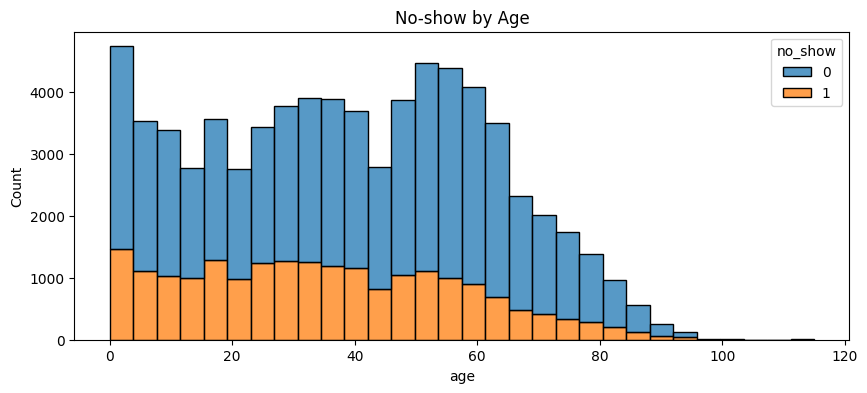

weekday
Wednesday    0.271474
Thursday     0.272671
Tuesday      0.286660
Saturday     0.290323
Friday       0.293544
Monday       0.302105
Name: no_show, dtype: float64


In [10]:
# Grouped no-show rate by SMS
sms_analysis = df.groupby('sms_received')['no_show'].mean()

# No-show rate by age
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='age', hue='no_show', bins=30, multiple='stack')
plt.title("No-show by Age")
plt.show()

# No-show by weekday
weekday_analysis = df.groupby('weekday')['no_show'].mean().sort_values()
print(weekday_analysis)

# Save clean data for Power BI
df.to_csv("cleaned_appointments_for_powerbi.csv", index=False)

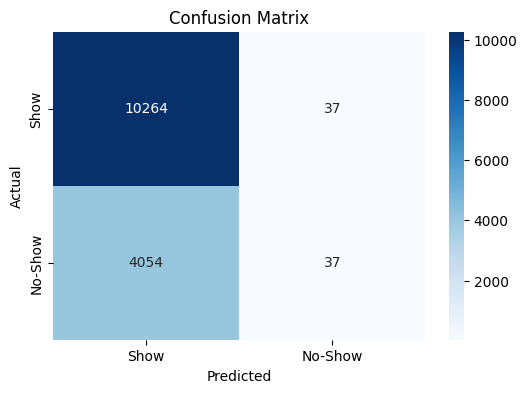

In [12]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Show', 'No-Show'], yticklabels=['Show', 'No-Show'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.7157448582545859

Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.83     10301
           1       0.50      0.01      0.02      4091

    accuracy                           0.72     14392
   macro avg       0.61      0.50      0.43     14392
weighted avg       0.66      0.72      0.60     14392

